## Preprocessing position for decoding

To decode, we need to:
1. Process position from pixel to cm; calculate speed. Table involved: IntervalPositionInfo
2. Linearize position (project 2D position to 1D track graph). Table involved: IntervalLinearizedPosition

In [26]:
%reload_ext autoreload
%autoreload 2

In [27]:
import spyglass as nd
import pandas as pd
import matplotlib.pyplot as plt
from spyglass.common.nwb_helper_fn import get_nwb_copy_filename
from spyglass.common import IntervalList
from spyglass.common.common_position import IntervalPositionInfo
from spyglass.common.common_position import IntervalPositionInfoSelection
from spyglass.common.common_position import IntervalLinearizationSelection
from spyglass.common.common_position import IntervalLinearizedPosition
from spyglass.common.common_position import TrackGraph

### The only cell to be edited:

In [96]:
nwb_file_name = 'molly20220418.nwb'

### Run the rest

In [97]:
from spyglass.common.common_nwbfile import Nwbfile
from spyglass.common.nwb_helper_fn import get_all_spatial_series,get_nwb_file

In [98]:
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

IntervalList_pd=pd.DataFrame(IntervalList &
             {'nwb_file_name': nwb_copy_file_name})

# select position timestamps, only those on the track are selected
position_interval=[]
for i in IntervalList_pd.index:
    interval=IntervalList_pd['interval_list_name'][i]
    if interval[-8:-1]=='Session':
        position_interval.append('pos '+str(i)+' valid times')

# add default calculation parameters
for pos_intvl in position_interval:
    IntervalPositionInfoSelection.insert1(
        {'nwb_file_name': nwb_copy_file_name,
         'interval_list_name': pos_intvl,
         'position_info_param_name': 'default' #default parameters are in the database already
        }, skip_duplicates=True)

    IntervalPositionInfoSelection.insert1(
        {'nwb_file_name': nwb_copy_file_name,
         'interval_list_name': pos_intvl,
         'position_info_param_name': 'default_decoding' #upsampled for decoding, default parameters are in the database already
        }, skip_duplicates=True)

IntervalPositionInfo.populate({'nwb_file_name': nwb_copy_file_name})

IntegrityError: Cannot add or update a child row: a foreign key constraint fails (`common_position`.`#interval_position_info_selection`, CONSTRAINT `#interval_position_info_selection_ibfk_2` FOREIGN KEY (`nwb_file_name`, `interval_list_name`) REFERENCES `common_interval`.`i)

In [99]:
position_interval

['pos 1 valid times',
 'pos 4 valid times',
 'pos 7 valid times',
 'pos 10 valid times',
 'pos 13 valid times']

In [85]:
IntervalLinearizedPosition().populate({'nwb_file_name': nwb_copy_file_name})

In [81]:
for pos_intvl in position_interval:
    IntervalLinearizationSelection.insert1(
        {'position_info_param_name': 'default',
         'nwb_file_name': nwb_copy_file_name,
         'interval_list_name': pos_intvl, #'pos 1 valid times',
         'track_graph_name': '4 arm lumped',
         'linearization_param_name': 'default'
        }, replace=True)
    
    IntervalLinearizationSelection.insert1(
        {'position_info_param_name': 'default_decoding',
         'nwb_file_name': nwb_copy_file_name,
         'interval_list_name': pos_intvl, #'pos 1 valid times',
         'track_graph_name': '4 arm lumped',
         'linearization_param_name': 'default'
        }, replace=True)

IntervalLinearizedPosition().populate({'nwb_file_name': nwb_copy_file_name})

IntegrityError: Cannot delete or update a parent row: a foreign key constraint fails (`common_position`.`__interval_linearized_position`, CONSTRAINT `__interval_linearized_position_ibfk_1` FOREIGN KEY (`position_info_param_name`, `nwb_file_name`, `interval_list_name`, `track_gr)

In [86]:
IntervalLinearizedPosition & {'nwb_file_name': nwb_copy_file_name}

position_info_param_name name for this set of parameters,nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,track_graph_name,linearization_param_name name for this set of parameters,analysis_file_name name of the file,linearized_position_object_id
default,molly20220419_.nwb,pos 1 valid times,4 arm lumped,default,molly20220419_H26TOH59OG.nwb,3088df49-7a92-4025-a414-97f128e04b06
default,molly20220419_.nwb,pos 3 valid times,4 arm lumped,default,molly20220419_A4PT0PAP7P.nwb,76dc0020-25dd-46df-ad94-54220e73505c
default,molly20220419_.nwb,pos 5 valid times,4 arm lumped,default,molly20220419_4KYPLWY5ZW.nwb,08198b26-d697-4a4f-a20c-e5a62a870712
default,molly20220419_.nwb,pos 7 valid times,4 arm lumped,default,molly20220419_GEL9EH4L9B.nwb,fa240574-a9e7-4522-a110-be62ff52822a
default,molly20220419_.nwb,pos 9 valid times,4 arm lumped,default,molly20220419_1HFNQ6YMXS.nwb,586dd434-1992-424f-ac4e-1ffabbd37b8a
default_decoding,molly20220419_.nwb,pos 1 valid times,4 arm lumped,default,molly20220419_ZTITQPKJ5X.nwb,a2c3eec1-5676-41dd-80e0-fae3d5f4c3e3
default_decoding,molly20220419_.nwb,pos 3 valid times,4 arm lumped,default,molly20220419_NG6V8G4X1T.nwb,4e2a7ef2-738d-423d-aee0-fb9d081e0ad9
default_decoding,molly20220419_.nwb,pos 5 valid times,4 arm lumped,default,molly20220419_A3IKV5JCFG.nwb,91469d41-3bed-4fc6-8572-ade769fc8f4e
default_decoding,molly20220419_.nwb,pos 7 valid times,4 arm lumped,default,molly20220419_M0XWSHVQ5H.nwb,8449a3fd-d1f7-46c8-8bcc-f1d550e7ab61
default_decoding,molly20220419_.nwb,pos 9 valid times,4 arm lumped,default,molly20220419_G4F9F30K9Q.nwb,cde7192e-41ac-4765-b294-de4b73dded5e


#### check one interval

In [64]:
linear_position_df

,linear_position,track_segment_id,projected_x_position,projected_y_position
time,,,,
1.650235e+09,NaN,0,NaN,NaN
1.650235e+09,15.728293,0,211.341504,218.309626
1.650235e+09,15.341185,0,211.314640,218.695801
1.650235e+09,14.709017,0,211.270769,219.326445
1.650235e+09,14.208596,0,211.236041,219.825659
...,...,...,...,...
1.650236e+09,NaN,0,NaN,NaN
1.650236e+09,NaN,0,NaN,NaN
1.650236e+09,NaN,0,NaN,NaN


Text(0.5, 1.0, 'Linear Position')

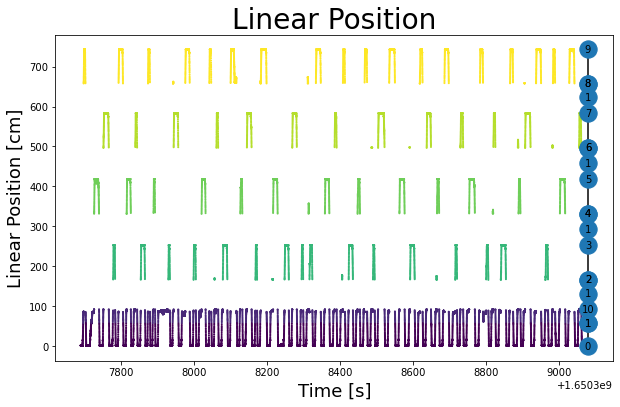

In [100]:
graph = TrackGraph() & {'track_graph_name': '4 arm lumped'}

linear_position_df= (IntervalLinearizedPosition() &
                     {'position_info_param_name': 'default',
                      'nwb_file_name': nwb_copy_file_name,
                      'interval_list_name': 'pos 3 valid times',
                      'track_graph_name': '4 arm lumped',
                      'linearization_param_name': 'default',
                     }).fetch1_dataframe()

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(linear_position_df.index,
            linear_position_df.linear_position,
            c=linear_position_df.track_segment_id,
            s=1)
graph.plot_track_graph_as_1D(
    ax=ax,
    axis='y',
    other_axis_start=linear_position_df.index[-1] + 10)

ax.set_xlabel('Time [s]', fontsize=18)
ax.set_ylabel('Linear Position [cm]', fontsize=18)
ax.set_title('Linear Position', fontsize=28)

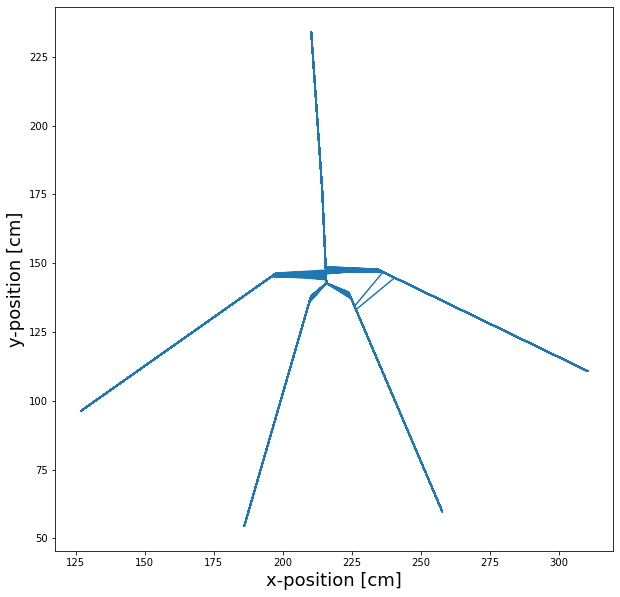

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#ax.plot(position_info.head_position_x, position_info.head_position_y,
#        color='lightgrey', alpha=0.7, zorder=0)
ax.set_xlabel('x-position [cm]', fontsize=18)
ax.set_ylabel('y-position [cm]', fontsize=18)
ax.plot(linear_position_df.projected_x_position, linear_position_df.projected_y_position)